### 분석 데이터 검토

In [5]:
import pandas as pd
data = pd.read_csv('./../../data/bigboongi/breast-cancer-wisconsin.csv', encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [6]:
data['Class'].value_counts(sort=False)

0    444
1    239
Name: Class, dtype: int64

In [7]:
data.shape

(683, 11)

### 특성(x)와 레이블(y)로 나누기

* 방법1 - 특성이름으로 특성 데이터셋(X) 나누기

In [8]:
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
           'Normal_Nucleoli', 'Mitoses']]

* 방법2 - 특성 위치값으로 특성 데이터셋(X) 나누기

In [9]:
X2 = data[data.columns[1:10]]

* 방법3 - loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함)

In [10]:
X3 = data.loc[:, 'Clump_Thickness':'Mitoses']

In [11]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [12]:
y = data[['Class']]

In [13]:
y.shape

(683, 1)

### train-test 데이터셋 나누기

* random_state - 분석할 때마다 다른 결과가 나오는 것을 막기 위해
* stratify=y - 훈련데이터와 테스트데이터 구분 시, 레이블의 범주 비율에 맞게 할 것

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=42)

In [15]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


### 정규화

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [18]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [19]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [20]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [22]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_scaled_standard_test = scaler_standard.transform(X_train)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


### 모델 학습

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

In [26]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [27]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬: \n', confusion_train)

훈련데이터 오차행렬: 
 [[328   5]
 [  9 170]]


In [29]:
confusion_test = confusion_matrix(y_test, pred_test)
print('테스트데이터 오차행렬: \n', confusion_test)

테스트데이터 오차행렬: 
 [[106   5]
 [  2  58]]


In [30]:
from sklearn.metrics import classification_report
cf_train = classification_report(y_train, pred_train)
print('분류예측 리포트: \n', cf_train)

분류예측 리포트: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [31]:
from sklearn.metrics import classification_report
cf_test = classification_report(y_test, pred_test)
print('분류예측 레포트: \n', cf_test)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fp_rate, tp_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

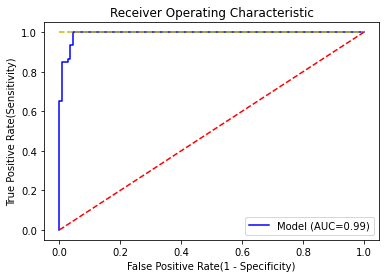

In [33]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(fp_rate, tp_rate, 'b', label='Model (AUC=%0.2f)' % roc_auc)
plt.plot([0, 1], [1, 1], 'y--')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(loc='lower right')
plt.show()